In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load track info
tracks = [
    {"raga": "thodi", "piece": "Karuna Nidhi Illalo"},
    {"raga": "thodi", "piece": "Koluvamaregatha"},
    {"raga": "thodi", "piece": "Munnu Ravana"},
    {"raga": "thodi", "piece": "Thappi Bratikipova"},
    {"raga": "kalyani", "piece": "Kailasapathe"},
    {"raga": "kalyani", "piece": "Sundari Nee Divya"},
    {"raga": "kalyani", "piece": "Vandalum"}
]
# Initialize an empty list to store DataFrames
dfs = []

# Load each CSV file into a DataFrame and append to the list
for track in tracks:
    raga = track["raga"]
    piece = track["piece"]
    metrics_file = f"{raga}/{piece}/{piece}-metrics.csv"
    df = pd.read_csv(metrics_file)
    df["raga"] = raga
    df["piece"] = piece
    dfs.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Name the first column as "section"
combined_df.columns.values[0] = "section"
combined_df

,section,t-stat,t-p,U-stat,U-p,Cross-entropy,raga,piece
0,Violin Alaapana vs Violin Main,-0.136316,0.891583,831428.5,5.217316e-11,6.751655,thodi,Karuna Nidhi Illalo
1,Violin Alaapana vs Violin Solo,-0.643286,0.520100,716375.0,8.309124e-01,6.692842,thodi,Karuna Nidhi Illalo
2,Violin Main vs Violin Solo,-0.355908,0.721941,605459.5,1.499609e-11,6.420000,thodi,Karuna Nidhi Illalo
3,Violin Alaapana vs Vocal Alaapana,-0.869533,0.384660,563345.5,2.731322e-20,6.806876,thodi,Karuna Nidhi Illalo
4,Violin Main vs Vocal Main,-0.503138,0.614936,464859.5,4.589330e-51,6.586140,thodi,Karuna Nidhi Illalo
5,Violin Alaapana vs Violin Main,-0.040600,0.967618,659575.0,3.711164e-04,6.297101,thodi,Koluvamaregatha
6,Violin Alaapana vs Violin Solo,-0.209017,0.834452,539494.5,2.066788e-26,6.235000,thodi,Koluvamaregatha
7,Violin Main vs Violin Solo,-0.197408,0.843525,605305.5,1.408662e-11,6.457820,thodi,Koluvamaregatha
8,Violin Alaapana vs Vocal Alaapana,-0.323709,0.746202,417037.0,2.966255e-71,6.515231,thodi,Koluvamaregatha
9,Violin Main vs Vocal Main,-0.410965,0.681150,471887.5,2.184691e-48,6.608884,thodi,Koluvamaregatha


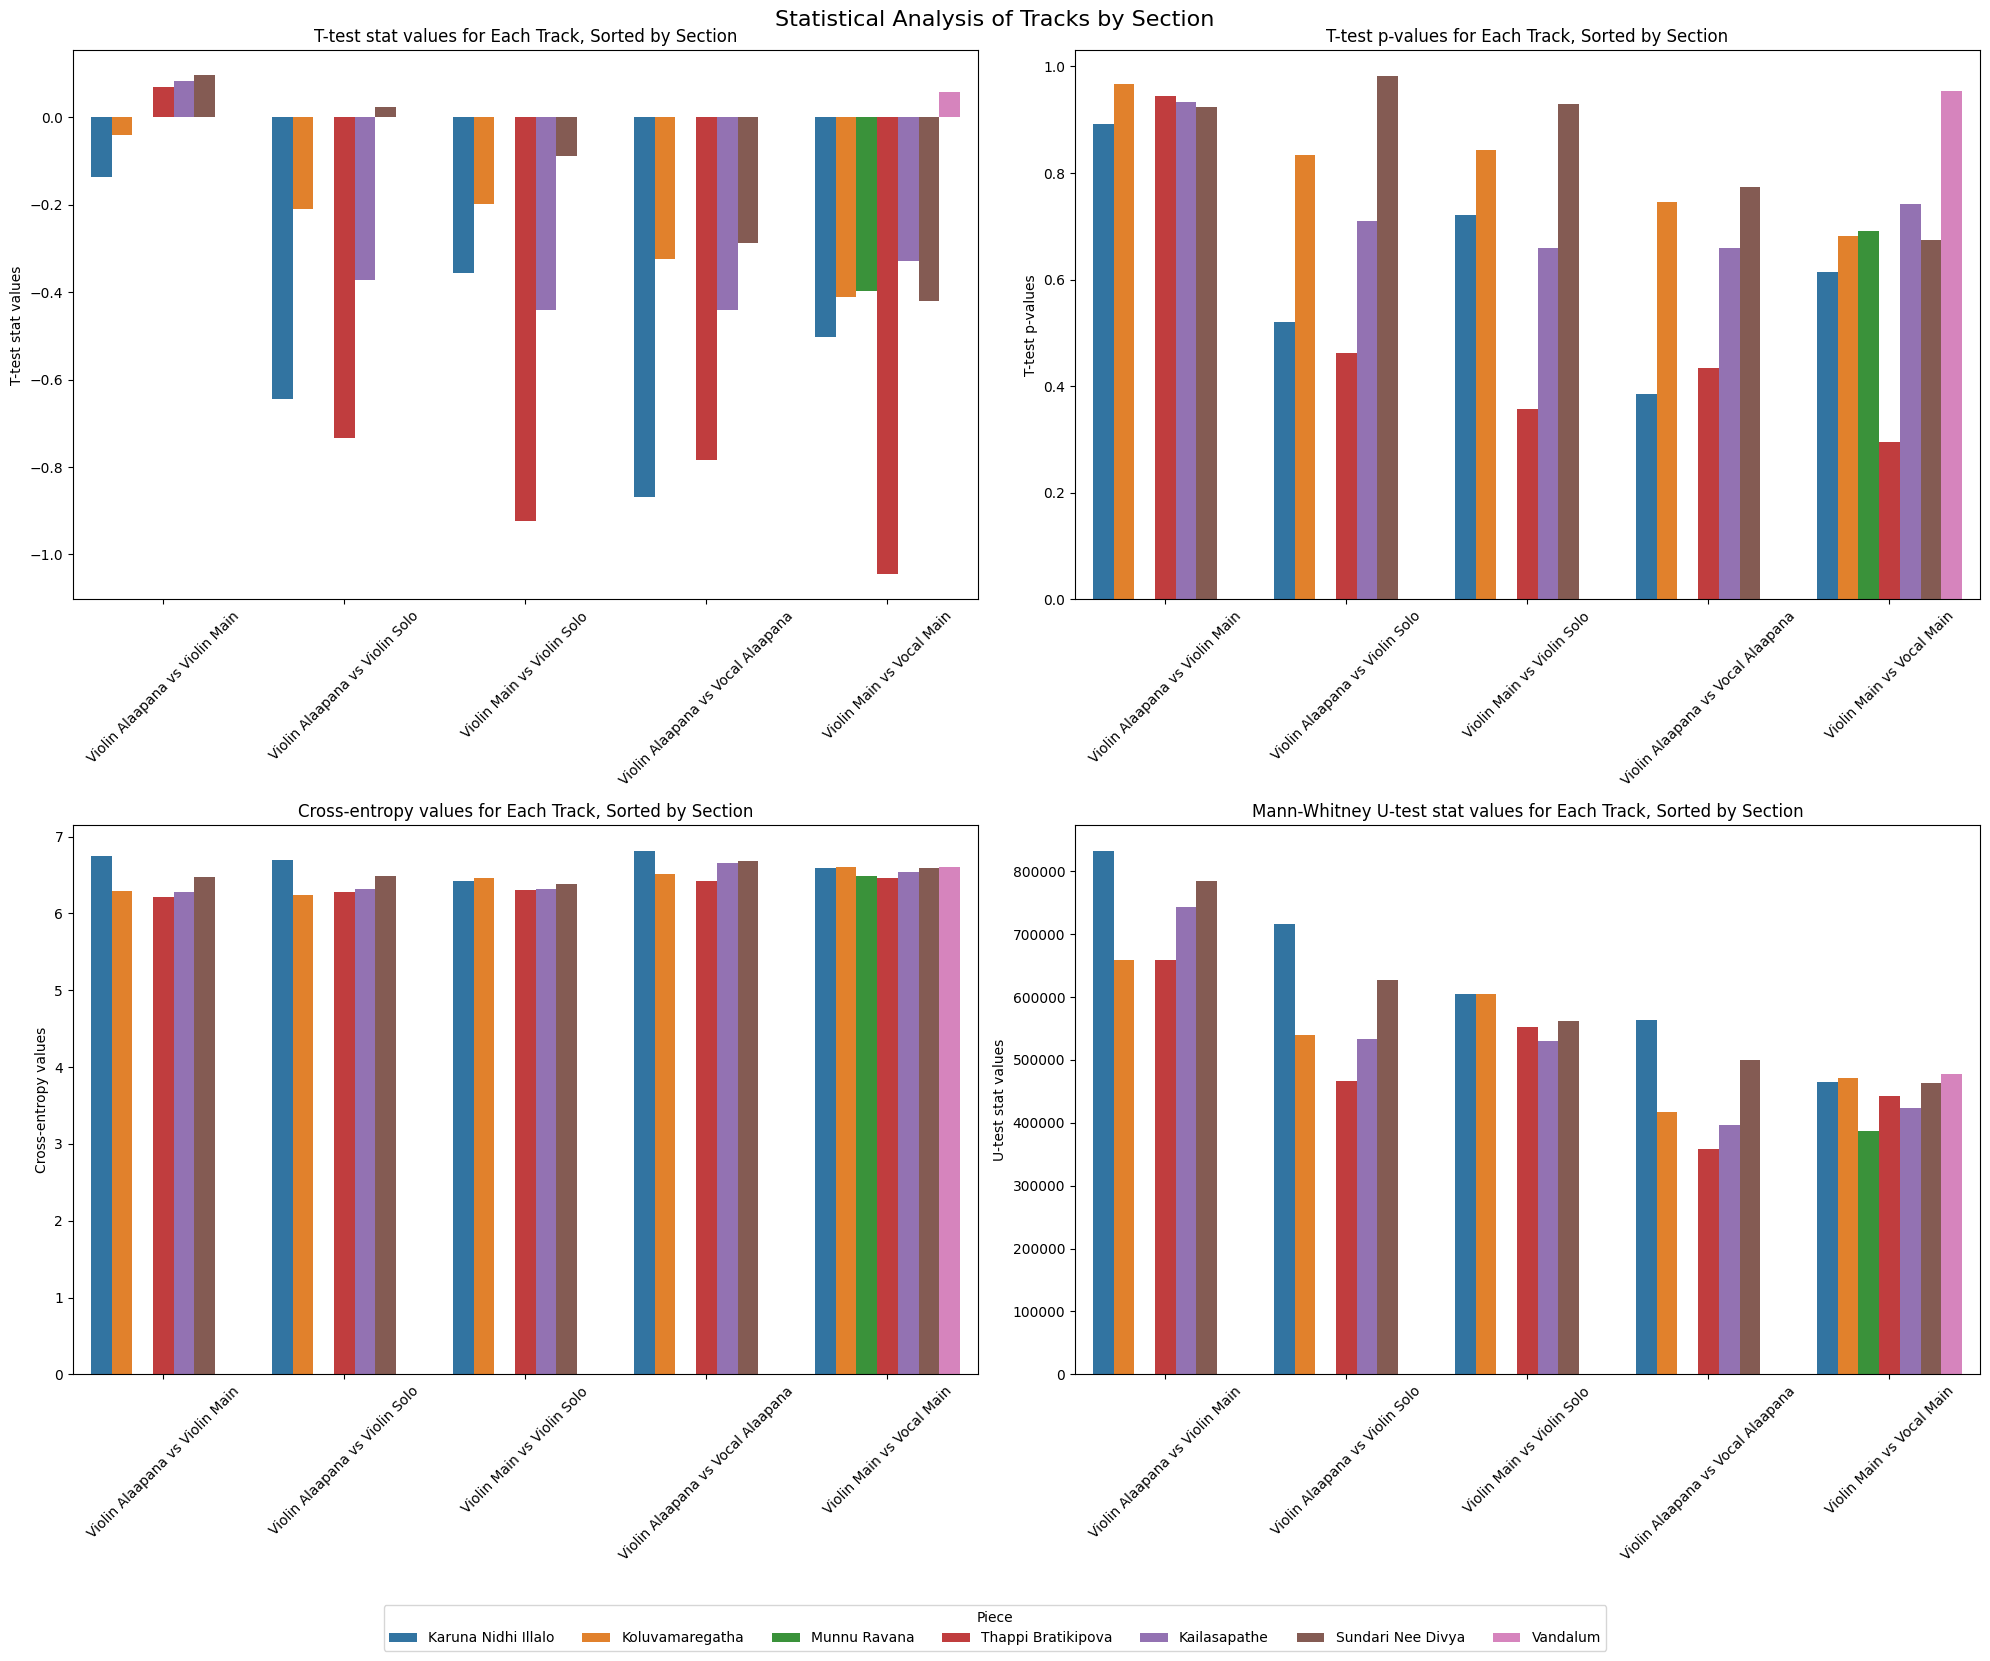

In [3]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot each bar plot in a different subplot
sns.barplot(data=combined_df, x="section", y="t-stat", hue="piece", ax=axes[0, 0])
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("T-test stat values")
axes[0, 0].set_title("T-test stat values for Each Track, Sorted by Section")
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=combined_df, x="section", y="t-p", hue="piece", ax=axes[0, 1])
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("T-test p-values")
axes[0, 1].set_title("T-test p-values for Each Track, Sorted by Section")
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(data=combined_df, x="section", y="Cross-entropy", hue="piece", ax=axes[1, 0])
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("Cross-entropy values")
axes[1, 0].set_title("Cross-entropy values for Each Track, Sorted by Section")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=combined_df, x="section", y="U-stat", hue="piece", ax=axes[1, 1])
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("U-test stat values")
axes[1, 1].set_title("Mann-Whitney U-test stat values for Each Track, Sorted by Section")
axes[1, 1].tick_params(axis='x', rotation=45)

# Remove individual legends
for ax in axes.flat:
    ax.legend_.remove()

# Create a common legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Piece", loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=7)

# Add a title for the overall figure
fig.suptitle("Statistical Analysis of Tracks by Section", fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

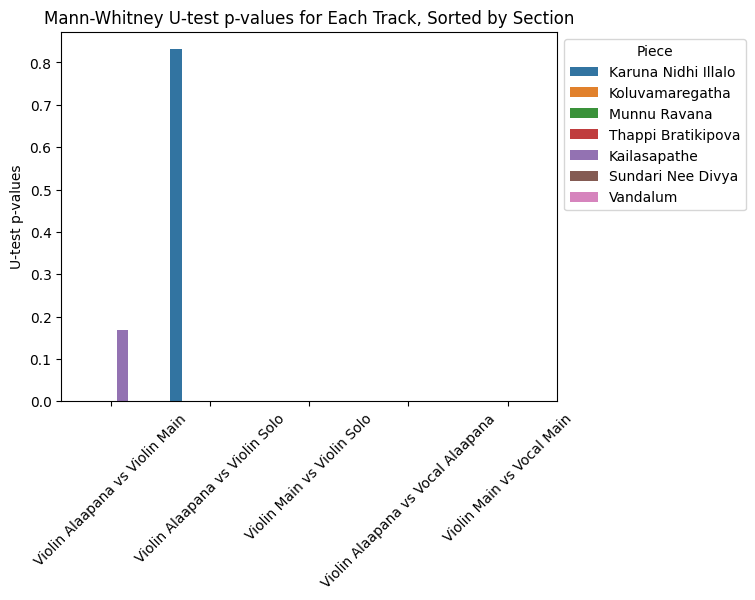

In [5]:
# Bar plot of U-test p-values for each track, sorted by section
sns.barplot(data=combined_df, x="section", y="U-p", hue="piece")
plt.xlabel("")
plt.ylabel("U-test p-values")
plt.title("Mann-Whitney U-test p-values for Each Track, Sorted by Section")
plt.xticks(rotation=45)
plt.legend(title="Piece", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()